In [12]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import CalcMolFormula
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw, AllChem
from rdkit.Chem.Scaffolds import MurckoScaffold
IPythonConsole.ipython_useSVG=False#< set this to False if you want PNGs instead of SVGs
Chem.Draw.DrawingOptions.includeAtomNumbers=True

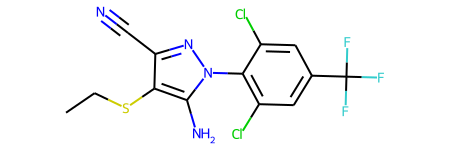

In [4]:
#5-Amino-1-[2,6-dichloro-4-(trifluoromethyl)phenyl]-4-(ethylthio)-1H-pyrazole-3-carbonitrile

target_pest = "CCSC1=C(N)N(N=C1C#N)C1=C(Cl)C=C(C=C1Cl)C(F)(F)F"
molT2 = Chem.MolFromSmiles(target_pest)
molT2

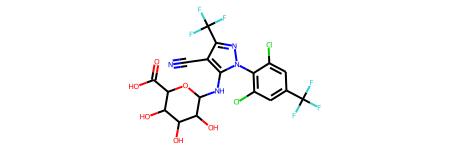

In [5]:
#Biotransformer only gave 1 phase2 transformation
target_pest_bio = "N(C1=C(C#N)C(=NN1C2=C(Cl)C=C(C=C2Cl)C(F)(F)F)C(F)(F)F)C3OC(C(O)C(O)C3O)C(O)=O"
molT2b = Chem.MolFromSmiles(target_pest_bio)
molT2b

Graph R-Group Swap by Rearrangment

In [17]:
core2 = MurckoScaffold.GetScaffoldForMol(molT2)
tempc2 = Chem.ReplaceCore(molT2, core2,  labelByIndex=True)
tempcs2 = Chem.MolToSmiles(tempc2)
frag2 = tempcs2.strip().split(".")
frag3 = []
for i in frag2:
    i = i.replace("*", "")
    if "]" in i:
        frag3.append(i.strip().split("]")[1])
    else:
        frag3.append(i.strip())

frag3


['SCC', 'N', 'Cl', 'C#N', 'Cl', 'C(F)(F)F']

{'CCSc1c(C#N)nn(-c2c(N)cc(C(F)(F)F)cc2Cl)c1Cl', 'CCSc1cc(Cl)c(-n2nc(C#N)c(C(F)(F)F)c2N)c(Cl)c1', 'CCSc1c(Cl)nn(-c2c(Cl)cc(C(F)(F)F)cc2C#N)c1N', 'CCSc1c(N)nn(-c2c(Cl)cc(C(F)(F)F)cc2Cl)c1C#N', 'CCSc1c(C#N)nn(-c2c(Cl)cc(N)cc2Cl)c1C(F)(F)F', 'CCSc1c(C#N)nn(-c2c(Cl)cc(C(F)(F)F)cc2Cl)c1N', 'CCSc1nn(-c2c(Cl)cc(C(F)(F)F)cc2Cl)c(N)c1C#N', 'CCSc1c(C#N)nn(-c2c(Cl)cc(Cl)cc2C(F)(F)F)c1N', 'CCSc1c(C(F)(F)F)nn(-c2c(Cl)cc(C#N)cc2Cl)c1N', 'CCSc1cc(C(F)(F)F)cc(Cl)c1-n1nc(C#N)c(Cl)c1N', 'CCSc1c(N)c(C#N)nn1-c1c(Cl)cc(C(F)(F)F)cc1Cl'}


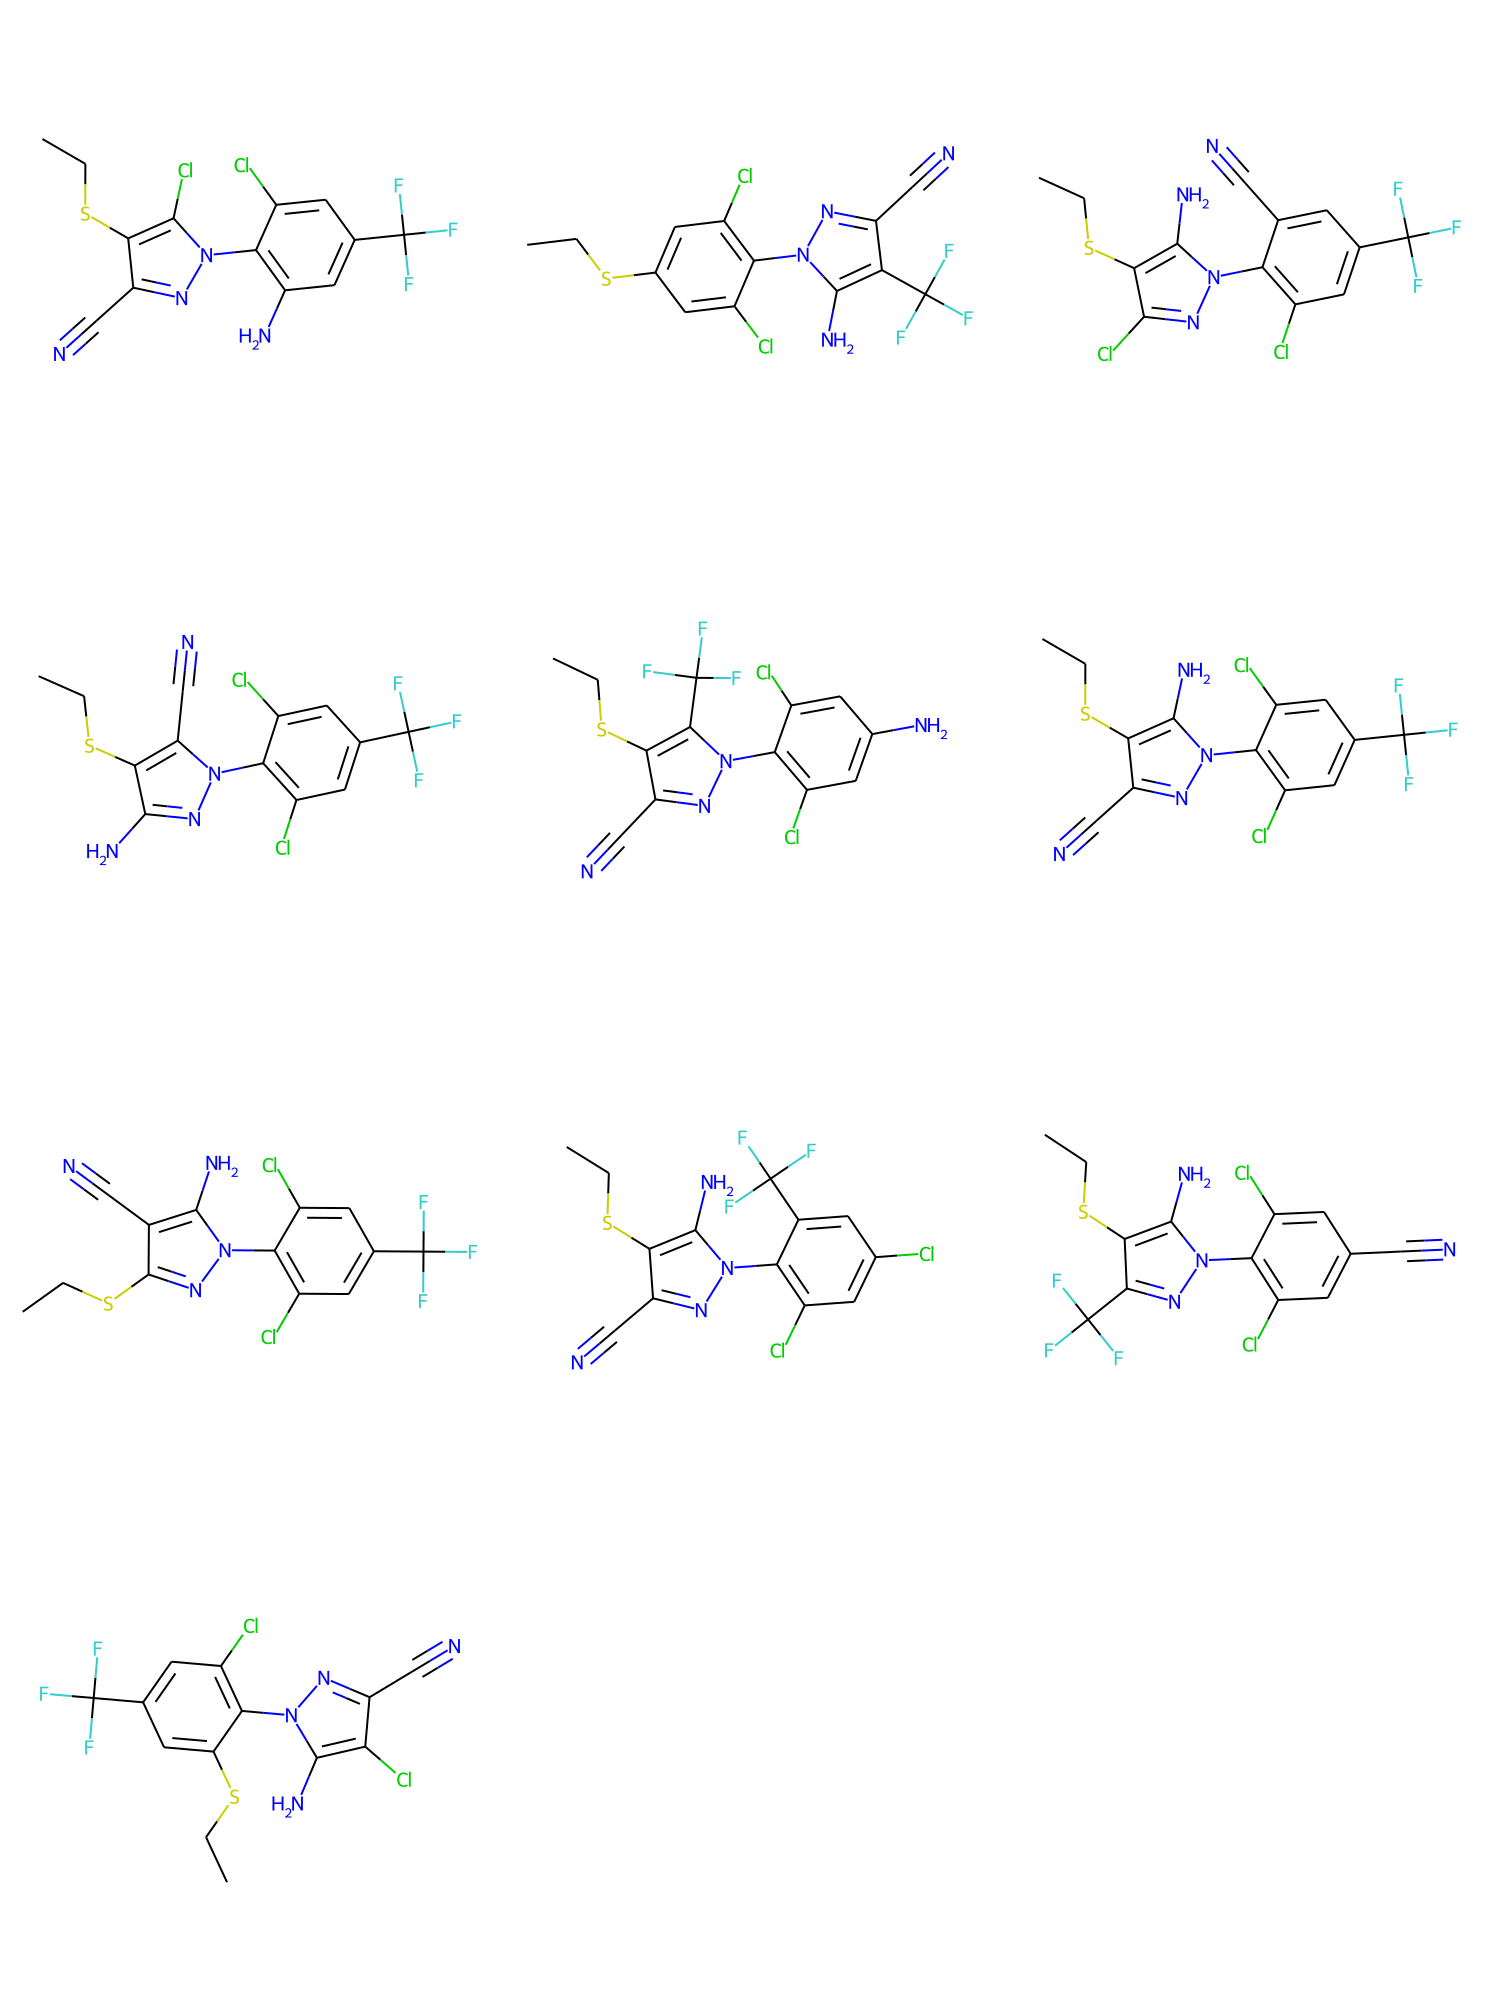

In [25]:
molT2 = Chem.MolFromSmiles(target_pest)
formula = CalcMolFormula(molT2)
moll = []
smiles = []
for i, s1 in enumerate(frag3):
    for j , s2 in enumerate(frag3):
        count = 0
        mod_mol = Chem.ReplaceSubstructs(molT2,
                                 Chem.MolFromSmiles(s1),
                                 Chem.MolFromSmiles(s2),
                                 replaceAll=False)
        while count <= 1:
            mod_mol2 = Chem.ReplaceSubstructs(mod_mol[0],
                                    Chem.MolFromSmiles(s2),
                                    Chem.MolFromSmiles(s1),
                                    replaceAll=False)
            if mod_mol2[0] is None:
                pass
            else:
                Chem.SanitizeMol(mod_mol2[0])
                moll.append(mod_mol2[0])
                smiles.append(Chem.MolToSmiles(mod_mol2[0]))
                # if formula == CalcMolFormula(mod_mol[0]) and target_pest != Chem.MolToSmiles(mod_mol[0]):
                #     moll.append(mod_mol[0])
                # else:
                #     pass
            count += 1

set_list = set(smiles)
mol_list = []
for i in set_list:
    mol_list.append(Chem.MolFromSmiles(i))
mol_show = Draw.MolsToGridImage(mol_list[:10], molsPerRow=3, subImgSize=(500, 500),
                                returnPNG=False)

print(set_list)
mol_show

Replacing Graph R-Groups by Rearrangement

In [4]:
core2 = MurckoScaffold.GetScaffoldForMol(molT2)
tempc2 = Chem.ReplaceCore(molT2, core2,  labelByIndex=True)
tempcs2 = Chem.MolToSmiles(tempc2)
frag2 = tempcs2.strip().split(".")
frag3 = []
for i in frag2:
    i = i.replace("*", "")
    if "]" in i:
        frag3.append(i.strip().split("]")[1])
    else:
        frag3.append(i.strip())

frag3

['SCC', 'N', 'Cl', 'C#N', 'Cl', 'C(F)(F)F']

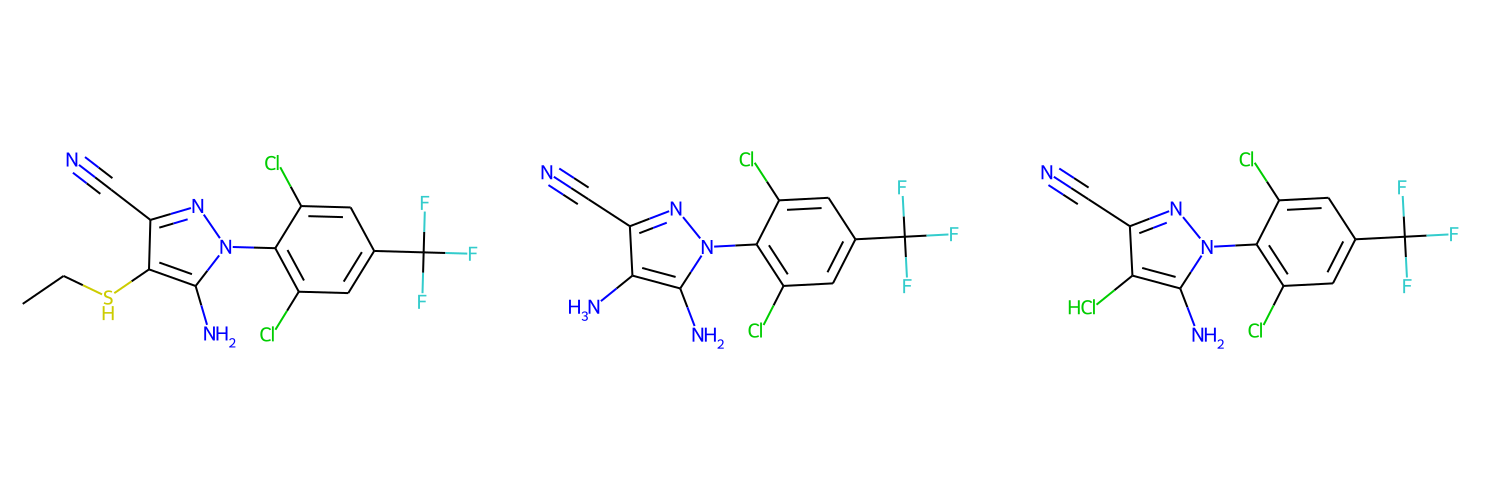

In [5]:
molT2 = Chem.MolFromSmiles(target_pest)
moll = []
for i, s1 in enumerate(frag3):
    for j, s2 in enumerate(frag3):
        mod_mol = Chem.ReplaceSubstructs(molT2,
                                 Chem.MolFromSmiles(s1),
                                 Chem.MolFromSmiles(s2),
                                 replaceAll=False)
        if mod_mol[0] is None:
            pass
        else:
            Chem.SanitizeMol(mod_mol[0])
            moll.append(mod_mol[0])


mol_show = Draw.MolsToGridImage(moll[:3], molsPerRow=3, subImgSize=(500, 500),
                                           returnPNG=False)
mol_show

Replacing Graph R Groups with ChemLife Fragments - Not Specific

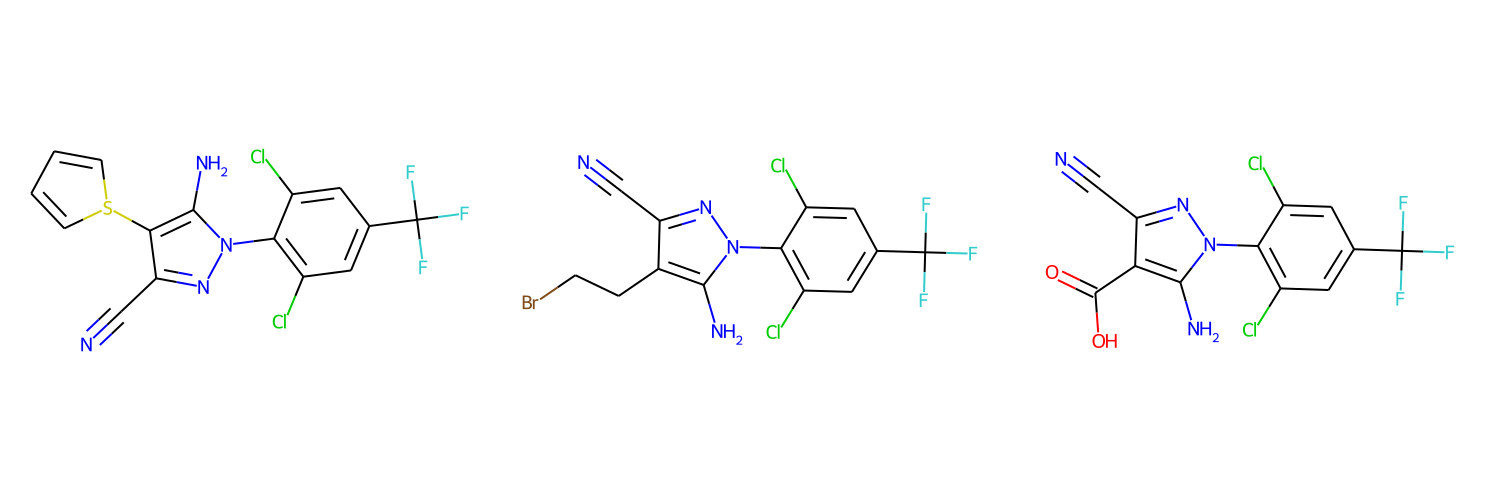

In [6]:
fragments = ["S1C=CC=C1", "CCBr", "C(=O)O"]
molT2 = Chem.MolFromSmiles(target_pest)
moll = []
for i, s1 in enumerate(frag3):
    for j, s2 in enumerate(fragments):
        mod_mol = Chem.ReplaceSubstructs(molT2,
                                 Chem.MolFromSmiles(s1),
                                 Chem.MolFromSmiles(s2),
                                 replaceAll=False)
        if mod_mol[0] is None:
            pass
        else:
            moll.append(mod_mol[0])


mol_show = Draw.MolsToGridImage(moll[:3], molsPerRow=3, subImgSize=(500, 500),
                                           returnPNG=False)
mol_show